# Getting Started with ```senselab```

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/audio/00_getting_started.ipynb)


Welcome to the `senselab` quick start tutorial!

This guide will showcase some of the key functionalities offered by `senselab`. We'll cover how to read, preprocess, analyze, and manipulate audio data. For more details, please check the documentation and task-specific tutorials.

Note that the package evolves continuously, so if you find that this tutorial breaks at some point, please let us know by opening an issue.

Let's get started!

## Installation

In [ ]:
%pip install senselab

Note: you may need to restart the kernel to use updated packages.


First, let's download some audio data for our demo:

In [2]:
!mkdir -p tutorial_audio_files
!wget -O tutorial_audio_files/audio_48khz_mono_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
!wget -O tutorial_audio_files/audio_48khz_stereo_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_stereo_16bits.wav

--2025-09-15 18:44:07--  https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav [following]
--2025-09-15 18:44:08--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472488 (461K) [audio/wav]
Saving to: ‘tutorial_audio_files/audio_48khz_mono_16bits.wav’

tutorial_audio_file 100%[===================>] 461.41K  --.-KB/s   

## Reading audio clips from disk:
Need to read some audio files from disk? **EASY!**

In [ ]:
from senselab.audio.tasks.input_output import read_audios

# The following line after the first time senselab is imported is necessary to display plots inline in Jupyter notebooks
%matplotlib inline  

import os

MONO_AUDIO_PATH = os.path.abspath("tutorial_audio_files/audio_48khz_mono_16bits.wav")
STEREO_AUDIO_PATH = os.path.abspath("tutorial_audio_files/audio_48khz_stereo_16bits.wav")

[audio1, audio2] = read_audios([MONO_AUDIO_PATH, STEREO_AUDIO_PATH])

Alternatively, if you want to read audio chunks from a stream (a filepath or URL or sys.stdin.buffer) you can do:

In [4]:
from senselab.audio.data_structures import Audio

for audio in Audio.from_stream(MONO_AUDIO_PATH):
    print(f"Audio chunk: {audio}")

Audio chunk: metadata={}
Audio chunk: metadata={}
Audio chunk: metadata={}
Audio chunk: metadata={}
Audio chunk: metadata={}


## Downmixing audio clips to mono
Want to downmix your audio to mono? It has neve been that **EASY!**! Here’s how:

In [5]:
from senselab.audio.tasks.preprocessing import downmix_audios_to_mono

print("The original audio has {} channels.".format(audio2.waveform.shape[0]))
audio2 = downmix_audios_to_mono([audio2])[0]
print("The downmixed audio has {} channels.".format(audio2.waveform.shape[0]))

The original audio has 2 channels.


/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
/Users/fabiocat/git/senselab/src/senselab/audio/data_structures/audio.py:183: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see htt

The downmixed audio has 1 channels.


## Resampling audio clips to 16000 Hz
Need to resample your audio to 16000 Hz? **EASY!**



In [6]:
from senselab.audio.tasks.preprocessing import resample_audios

print("The original audio has a sampling rate of {} Hz.".format(audio1.sampling_rate))
[audio1, audio2] = resample_audios([audio1, audio2], resample_rate=16000)
print("The resampled audio has a sampling rate of {} Hz.".format(audio1.sampling_rate))

The original audio has a sampling rate of 48000 Hz.


/Users/fabiocat/git/senselab/src/senselab/audio/data_structures/audio.py:132: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  info = torchaudio.info(self._file_path)


The resampled audio has a sampling rate of 16000 Hz.


## Playing and plotting audio
Want to play or plot your audio? **EASY!**! Here is how:

In [7]:
from senselab.audio.tasks.plotting.plotting import play_audio

play_audio(audio1);

/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torchaudio/pipelines/_squim_pipeline.py:53: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  path = torchaudio.utils.download_asset(f"models/{self._path}")
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torchaudio/pipelines/_squim_pipeline.py:128: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  path = torchaudio.utils.downlo

<Figure size 640x480 with 0 Axes>

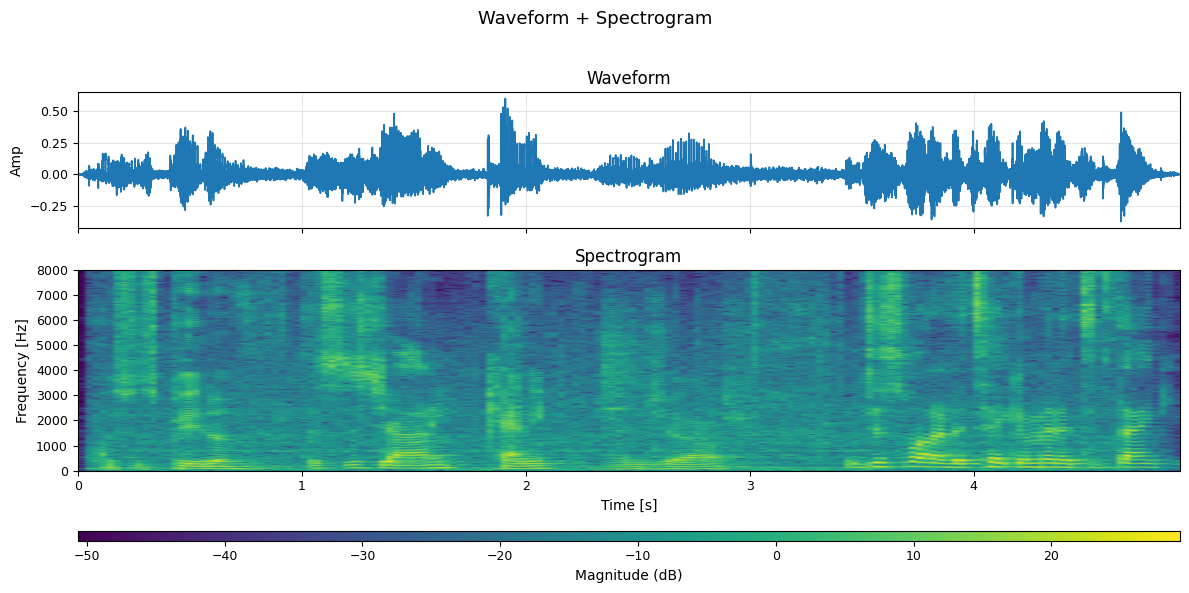

In [8]:
from senselab.audio.tasks.plotting.plotting import plot_waveform_and_specgram

plot_waveform_and_specgram(audio1);

## Voice Activity Detection
Want to detect when someone is speaking? **EASY!**

**Note**: You will need to request access to the following huggingface models:

- https://huggingface.co/pyannote/segmentation-3.0
- https://huggingface.co/pyannote/speaker-diarization-3.1

And then create a HuggingFace token and add it to your Google colab secrets (see the key on the left column) as a variable called `HF_TOKEN`

In [9]:
from senselab.audio.tasks.voice_activity_detection import detect_human_voice_activity_in_audios
from senselab.utils.data_structures import PyannoteAudioModel

pyannote_model = PyannoteAudioModel(path_or_uri="pyannote/speaker-diarization-3.1", revision="main")
voice_activity_results = detect_human_voice_activity_in_audios(audios=[audio1, audio2], model=pyannote_model)
print("Voice activity detection results: {}".format(voice_activity_results))

2025-09-15 18:44:33,995 - senselab - INFO - Time taken to initialize the pyannote model: 1.75 seconds
2025-09-15 18:44:35,212 - senselab - INFO - Time taken to perform diarization: 1.22 seconds


Voice activity detection results: [[VOICE:  [0.03 - 3.05], VOICE:  [3.32 - 4.89]], [VOICE:  [0.03 - 3.05], VOICE:  [3.32 - 4.89]]]


## Speaker Diarization
Wondering who is speaking and when? **EASY!**

In [10]:
from senselab.audio.tasks.speaker_diarization import diarize_audios

pyannote_model = PyannoteAudioModel(path_or_uri="pyannote/speaker-diarization-3.1", revision="main")
diarization_results = diarize_audios(audios=[audio1, audio2], model=pyannote_model)

print("Diarization results: {}".format(diarization_results))

2025-09-15 18:44:35,308 - senselab - INFO - Time taken to initialize the pyannote model: 0.00 seconds
2025-09-15 18:44:36,393 - senselab - INFO - Time taken to perform diarization: 1.08 seconds


Diarization results: [[SPEAKER_00:  [0.03 - 3.05], SPEAKER_01:  [3.32 - 4.89]], [SPEAKER_00:  [0.03 - 3.05], SPEAKER_01:  [3.32 - 4.89]]]


## Automatic Speech Recognition
Want to convert speech to text? **EASY!**! Use this:


In [11]:
from senselab.audio.tasks.speech_to_text import transcribe_audios
from senselab.utils.data_structures import HFModel

hf_model = HFModel(path_or_uri="openai/whisper-tiny", revision="main")
transcripts = transcribe_audios(audios=[audio1, audio2], model=hf_model)

print("Transcripts: {}".format(transcripts))

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cpu
Using `chunk_length_s` is very experimental with seq2seq models. The results will not necessarily be entirely accurate and will have caveats. More information: https://github.com/huggingface/transformers/pull/20104. Ignore this warning with pipeline(..., ignore_warning=True). To use Whisper for long-form transcription, use rather the model's `generate` method directly as the model relies on it's own chunking mechanism (cf. Whisper original paper, section 3.8. Long-form Transcription).
2025-09-15 18:44:37,270 - senselab - INFO - Time taken to initialize the hugging face ASR pipeline: 0.72 seconds
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate yo

Transcripts: [This is Peter. This is Johnny. Kenny. Thank you. We just wanted to take a minute to thank you. [0.00 - 4.90]
    This [0.00 - 0.30]
    is [0.30 - 0.48]
    Peter. [0.48 - 1.06]
    This [1.06 - 1.18]
    is [1.18 - 1.40]
    Johnny. [1.40 - 1.72]
    Kenny. [1.86 - 2.42]
    Thank [2.42 - 2.66]
    you. [2.66 - 2.98]
    We [3.38 - 3.58]
    just [3.58 - 3.78]
    wanted [3.78 - 3.90]
    to [3.90 - 4.04]
    take [4.04 - 4.24]
    a [4.24 - 4.38]
    minute [4.38 - 4.48]
    to [4.48 - 4.68]
    thank [4.68 - 4.90]
    you. [4.90 - 4.90], This is Peter. This is Johnny. Kenny. Thank you. We just wanted to take a minute to thank you. [0.00 - 5.14]
    This [0.00 - 0.30]
    is [0.30 - 0.48]
    Peter. [0.48 - 1.06]
    This [1.06 - 1.18]
    is [1.18 - 1.40]
    Johnny. [1.40 - 1.72]
    Kenny. [1.86 - 2.42]
    Thank [2.42 - 2.66]
    you. [2.66 - 2.98]
    We [3.38 - 3.58]
    just [3.58 - 3.78]
    wanted [3.78 - 3.90]
    to [3.90 - 4.04]
    take [4.04 - 4.24]
    a 

## Speaker Embeddings
Need to get unique speaker signatures? **EASY!** Here’s how:

In [12]:
from senselab.audio.tasks.speaker_embeddings import extract_speaker_embeddings_from_audios
from senselab.utils.data_structures import SpeechBrainModel

ecapa_model = SpeechBrainModel(path_or_uri="speechbrain/spkrec-ecapa-voxceleb", revision="main")
embeddings = extract_speaker_embeddings_from_audios(audios=[audio1, audio1], model=ecapa_model)

print("Speaker embeddings: {}".format(embeddings))

Speaker embeddings: [tensor([ 16.2103,   7.1481,  15.5266,  17.2746,  16.4431, -20.5747,  13.3308,
         35.0159,  -9.9832, -15.2936,   8.7431, -48.9115, -12.3712,   0.3205,
        -14.1499,  13.8494,  16.3174,  -5.4812, -11.2281,  12.1649, -16.4342,
         -4.4602,  -9.6185,   5.8606,  12.5524,  16.0434,  11.6930, -22.9584,
        -65.9523, -36.1734, -10.4747, -14.4245,  25.6371,  -0.5435, -16.0213,
         -7.1728,  15.8913, -19.5261,  20.3323,   6.4870,   1.3960,  47.1323,
         15.4057,   3.0137,  -6.1211,   9.2284,  -6.8622,  -6.3000,   2.0148,
        -13.6586, -28.2244,  -7.2423,  16.8126,  19.4284,  10.0292,  -0.4392,
        -14.4365, -34.5860,  -7.1497,   9.9081,  -5.9784,  24.1302, -18.4009,
          3.8924,  28.3383, -19.1870, -20.4689, -11.3760, -22.3829, -23.5192,
         -8.0118,  16.7557, -13.0733, -14.4308,  17.9192,  12.4343,  -3.5196,
        -14.0531, -12.2169,  -3.7699,  21.0059, -25.2338,   7.1492,  13.7158,
        -10.7264,   5.1551,  10.4972,  15.6

## Speech Emotion Recognition
Want to know the emotions in the speech? **EASY!**

In [13]:
from senselab.audio.tasks.classification.speech_emotion_recognition import classify_emotions_from_speech

emotion_model = HFModel(path_or_uri="ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")
emotion_results = classify_emotions_from_speech([audio1, audio2], emotion_model)

print("Emotion results: {}".format(emotion_results))

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition and are newly initialized: ['classifier.bias', 'classifier.weight', '

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

Device set to use cpu
2025-09-15 18:45:04,306 - senselab - INFO - Time taken to initialize the hugging face audio classification             pipeline: 24.63 seconds
2025-09-15 18:45:07,080 - senselab - INFO - Time taken for classifying the audios: 2.77 seconds


Emotion results: [AudioClassificationResult(labels=['surprised', 'fearful', 'sad', 'calm', 'neutral', 'angry', 'happy', 'disgust'], scores=[0.13263334333896637, 0.1320166438817978, 0.1298523098230362, 0.1276293396949768, 0.12435133755207062, 0.12163046002388, 0.11747904121875763, 0.1144075021147728]), AudioClassificationResult(labels=['fearful', 'surprised', 'sad', 'calm', 'neutral', 'angry', 'happy', 'disgust'], scores=[0.1342286914587021, 0.1333867609500885, 0.13139794766902924, 0.12626409530639648, 0.12449109554290771, 0.12079381942749023, 0.11710284650325775, 0.11233466118574142])]


## Audio Augmentation
Need to augment your audio data? **EASY!**! Here’s how:

In [14]:
from torch_audiomentations import Compose, PolarityInversion

from senselab.audio.tasks.data_augmentation import augment_audios

apply_augmentation = Compose(transforms=[PolarityInversion(p=1, output_type="dict")], output_type="dict")
[augmented_audio1, augmented_audio2] = augment_audios([audio1, audio2], apply_augmentation)

print("Augmented audio: {}".format(augmented_audio1))

Augmented audio: metadata={}


## Feature Extraction
Want to extract some OPENSMILE features from audio? **EASY!**


In [15]:
from senselab.audio.tasks.features_extraction.opensmile import extract_opensmile_features_from_audios

features = extract_opensmile_features_from_audios([audio1, audio2])

print("OpenSMILE features: {}".format(features))

OpenSMILE features: [{'F0semitoneFrom27.5Hz_sma3nz_amean': 25.698163986206055, 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm': 0.16188377141952515, 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0': 21.086231231689453, 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0': 25.95663833618164, 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0': 29.55903434753418, 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': 8.472803115844727, 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': 83.9542236328125, 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': 98.96835327148438, 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': 22.007436752319336, 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': 9.038254737854004, 'loudness_sma3_amean': 0.9028185606002808, 'loudness_sma3_stddevNorm': 0.3705090582370758, 'loudness_sma3_percentile20.0': 0.610856294631958, 'loudness_sma3_percentile50.0': 0.8606764674186707, 'loudness_sma3_percentile80.0': 1.191395878791809, 'loudness_sma3_pctlrange0-2': 0.5805395841598511, 'loudness_sma3_meanRisingSlope': 1

## Speech Enhancement
Need to clean up your audio? **EASY!** Here’s how:

In [16]:
from senselab.audio.tasks.speech_enhancement import enhance_audios
from senselab.utils.data_structures import SpeechBrainModel

speechbrain_model = SpeechBrainModel(path_or_uri="speechbrain/sepformer-wham16k-enhancement", revision="main")
enhanced_audios = enhance_audios(audios=[audio1, audio2], model=speechbrain_model)

print("Enhanced audios: {}".format(enhanced_audios))

Failed to load SpeechBrain model as a SpectralMaskEnhancement model: Need hparams['compute_stft']
Trying to load as a SepformerSeparation model...


2025-09-15 18:45:10,348 - senselab - INFO - Time taken to initialize the speechbrain model: 1.00 seconds
2025-09-15 18:45:21,468 - senselab - INFO - Time taken for enhancing the audios: 11.12 seconds


Enhanced audios: [Audio(metadata={}), Audio(metadata={})]


## More Tutorials
For more tutorials, please check [**here**](https://github.com/sensein/senselab/blob/main/tutorials).